## Linear Regression: Dos and Don'ts  

#### 1 Statistical aspects of the underlying data: Multicollinearity

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [35]:
# Create a fake regression dataset using scikit's built-in functions

X1, y1 = make_regression(n_samples=1000, n_features=15, noise=0.9)
# convert to a dataframe
df1 = pd.DataFrame(X1)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.022041,-3.062487,-0.819441,-0.782170,1.944639,1.087005,-0.029278,-0.641349,-0.201491,-0.906762,1.050362,-1.363927,0.110860,1.314606,0.289220
1,-1.229528,0.750136,-0.271194,-1.711827,-0.468242,0.879198,-1.429064,0.074140,-0.014591,-1.768910,0.857951,1.458592,0.556446,0.375964,1.632807
2,1.139090,0.762773,1.411031,-0.077307,-1.975138,0.217048,0.734088,0.899598,-0.131072,-0.183554,-0.007248,1.274153,1.477549,0.305934,-0.228369
3,-0.096838,-0.941905,-0.670030,2.094335,-1.259236,-0.555375,-0.782093,-0.722720,1.955286,0.401442,-0.912247,-0.017587,-1.600245,0.164090,0.018246
4,1.047852,-1.684512,-0.209416,0.720223,-0.964823,0.627944,1.403980,0.873615,-0.773187,0.805618,-0.797815,2.176825,2.185041,0.255659,2.191327


#### How regression impacts a dataset with no multicollinearity

In [36]:
# Cross Validation will fit the classifier N number of times
# and display the accuracies
cv1 = cross_val_score(LinearRegression(), X1, y1, cv=10)
print("Mean: {}".format(cv1.mean()))
print("Values: {}".format(cv1))

Mean: 0.9999742713425486
Values: [0.99997368 0.99996988 0.99997594 0.99997999 0.99996145 0.99997977
 0.99996882 0.99998026 0.99997748 0.99997545]


#### Create a new dataset with high multicollinearity

In [37]:
# let's create the dataset again, but this time, introduce high multicollinearity by setting low rank to the input matrix
X2, y2 = make_regression(n_samples=1000, n_features=15, noise=0.95, effective_rank=1)
df2 = pd.DataFrame(X2)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.024169,-0.004514,0.032384,-0.027197,-0.014573,0.007586,-0.000043,-0.005436,-0.000608,-0.002117,0.023125,0.000480,0.006123,-0.009695,0.000013
1,0.024809,0.004545,-0.024196,0.034838,0.004215,-0.023911,-0.001687,-0.014644,0.009048,0.001535,-0.023104,0.016262,0.002205,0.001369,0.013487
2,0.002169,-0.007483,0.005596,0.013351,0.008596,0.000166,0.009387,-0.014615,-0.000182,-0.000353,-0.006845,0.000684,-0.001145,-0.000637,-0.003595
3,0.043403,0.008764,-0.027943,0.029197,0.025055,0.002451,-0.001024,-0.003691,0.023601,0.011138,-0.041156,-0.006007,0.004729,0.006564,-0.000116
4,0.004540,-0.020302,-0.004873,0.010052,0.003322,0.009186,0.011873,-0.011884,0.011710,0.010791,-0.010389,0.013046,0.004238,0.004837,-0.008838


#### How regression impacts a dataset with high multicollinearity

In [38]:
# Cross Validation will fit the classifier N number of times
# and display the accuracies
cv2 = cross_val_score(LinearRegression(), X2, y2, cv=10)
print("Mean: {}".format(cv2.mean()))
print("Values: {}".format(cv2))

Mean: 0.8600559910855526
Values: [0.91007061 0.89146499 0.84007759 0.88570249 0.87333759 0.83428157
 0.817257   0.83437045 0.88349441 0.83050321]


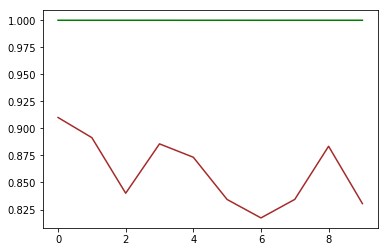

In [48]:
plt.plot(cv1, color='g', label='Low MC')
plt.plot(cv2, color='brown',label='High MC')

#### 2 Presence of outliers and the problem with ordinary least squares regression

In [118]:
import numpy as np
import matplotlib.pyplot as plt

X3 = np.linspace(1, 100, 150)
y3 = X3 * 3 + 10

y3[120:140] = np.random.rand(20) * 80 - 100
y3[40:60] = np.random.rand(20) * 220 + 100

# Needed since X, and y has only 1 feature
X3 = X3.reshape(-1, 1)
y3 = y3.reshape(-1, 1)

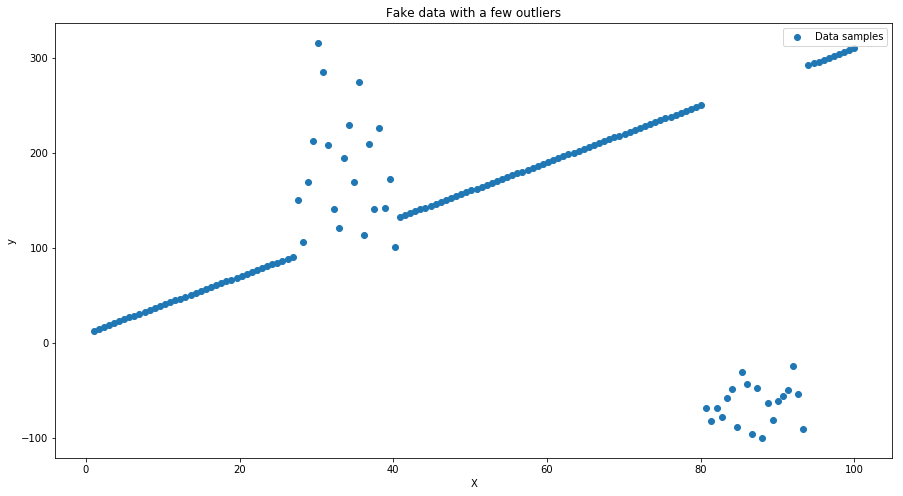

In [119]:
# visualizing data
def plot(clf=None, clf_name="", color=None):
    fig = plt.figure(figsize=(15, 8))
    plt.scatter(X3, y3, label="Data samples")
    plt.title("Fake data with a few outliers")
    if clf is not None:
        y_pred3 = clf.predict(X3)
        plt.plot(X3, y_pred3, label=clf_name, color=color)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()
plot()

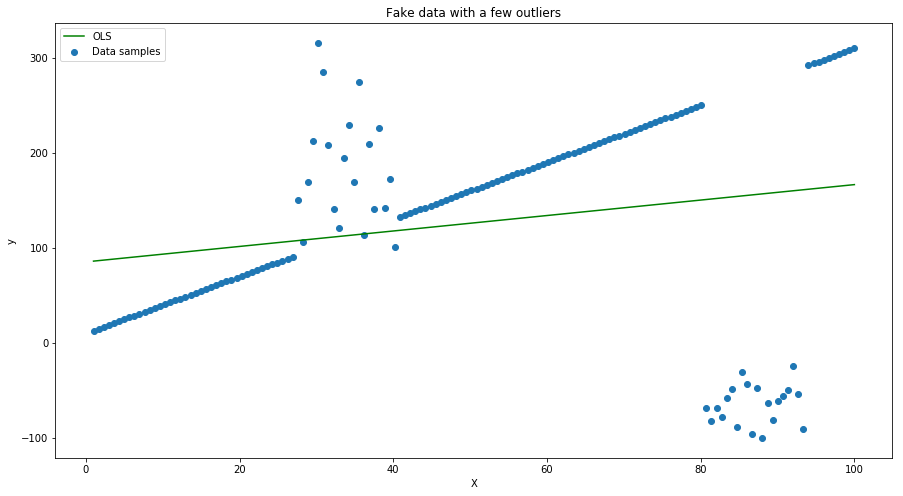

In [121]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X3, y3)
plot(lr, "OLS", 'green')

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


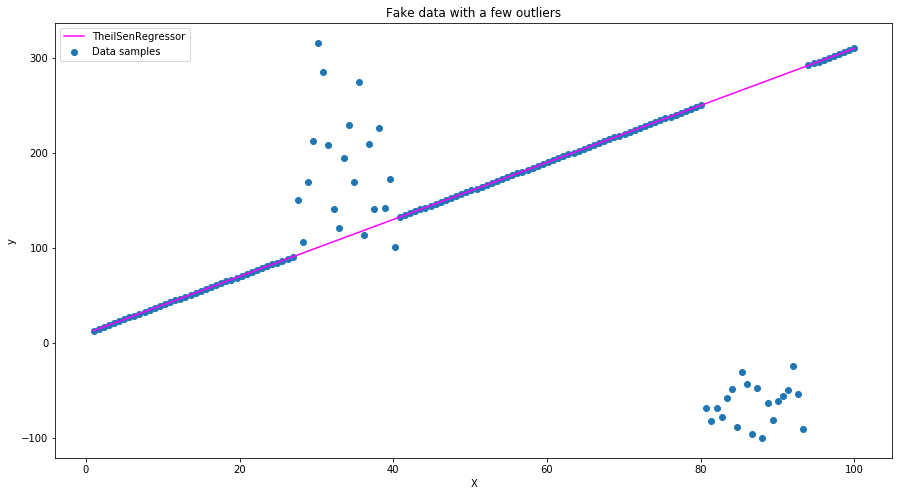

In [124]:
from sklearn.linear_model import TheilSenRegressor

tr = TheilSenRegressor().fit(X3, y3)
plot(tr, "TheilSenRegressor", "magenta")

As we can see TheilSen Regressor has done a better job than the OLS Regression when data has many perturbations.

For more information, refer: http://scikit-learn.org/stable/auto_examples/linear_model/plot_theilsen.html